In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

# read csv
bag_data = pd.read_csv("./bag.csv")
o18_data = pd.read_csv("./o18.csv")

In [23]:
age = bag_data['Age']

In [24]:
deu = bag_data['Deuterium']

In [25]:
temp = bag_data['Temperature']

No handles with labels found to put in legend.


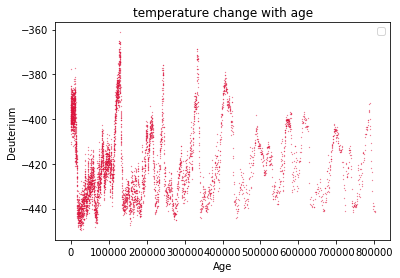

In [26]:
#colour = -np.arctan2(deu, temperature) # 生成每个点的颜色大小，每个数据点生成控制颜色的数组 colour
plt.scatter(age,deu,s=0.05,c='crimson' )
#plt.colorbar() 
plt.xlabel('Age')
plt.ylabel('Deuterium')
plt.title("temperature change with age")
plt.legend()

In [27]:
time = 100*o18_data["Time"]
o18 = o18_data["d18O"]

No handles with labels found to put in legend.


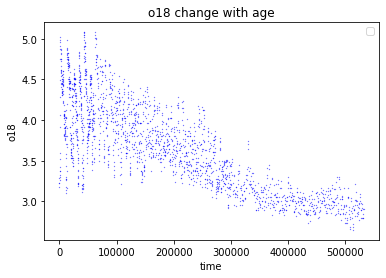

In [28]:
#colour = -np.arctan2(deu, temperature) # 生成每个点的颜色大小，每个数据点生成控制颜色的数组 colour
plt.scatter(time, o18,s=0.05,c='blue' )
#plt.colorbar() 
plt.xlabel('time')
plt.ylabel('o18')
plt.title("o18 change with age")
plt.legend()

In [99]:
deu_norm = (deu-deu.min())/(deu.max()-deu.min())
o18_norm = (o18-o18.min())/(o18.max()-o18.min())
new_o18 = o18_norm*(deu.max()-deu.min())+deu.min()

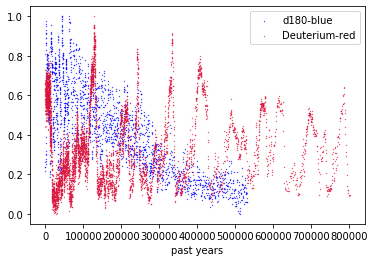

In [30]:
plt.scatter(time, o18_norm,s=0.1,c='blue' ,label ="d180-blue")
plt.scatter(age,deu_norm,s=0.1,c='crimson',label = "Deuterium-red" )
plt.xlabel('past years')
plt.legend()

No handles with labels found to put in legend.


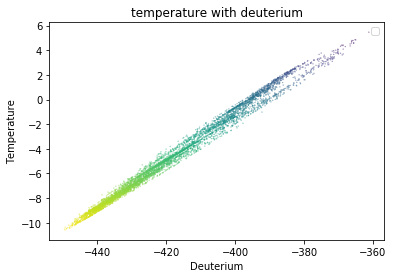

In [31]:
colour = -np.arctan2(deu, temp) # 生成每个点的颜色大小，每个数据点生成控制颜色的数组 colour
plt.scatter(deu,temp,s=0.05,c=colour )
#plt.colorbar() 
plt.ylabel('Temperature')
plt.xlabel('Deuterium')
plt.title("temperature with deuterium")
plt.legend()

In [89]:
model = linear_model.LinearRegression()
deu = deu.values.reshape(-1,1)
temp = temp.values.reshape(-1,1)
print(np.shape(deu))
model.fit(deu, temp)     # model.fit(X, y)
pred = model.predict(deu)

(5785, 1)


In [33]:
display(model.intercept_)  #截距
display(model.coef_)  #线性模型的系数

array([74.99699858])

array([[0.19046891]])

No handles with labels found to put in legend.


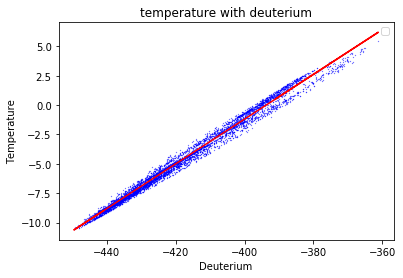

In [34]:
#colour = -np.arctan2(deu, temperature) # 生成每个点的颜色大小，每个数据点生成控制颜色的数组 colour
plt.scatter(deu,temp,s=0.05,c='blue' )
plt.plot(deu,pred,'r')
#plt.scatter(deu,pred,c='aqua',s=0.1,marker='x')
#plt.colorbar() 
plt.ylabel('Temperature')
plt.xlabel('Deuterium')
plt.title("temperature with deuterium")
plt.legend()

In [48]:
loss = (pred-temp)*(pred-temp)
mse = loss.flatten().mean()
print("mean squared error is",mse)

mean squared error is 0.12702515786548416


In [49]:
marine_data = pd.read_csv("./MarineIsotopeStages.csv")

In [52]:
marine_data

,MIS,StartAge,GlacialInterglacial
0,1,14000,0
1,4,71000,1
2,5,130000,0
3,6,191000,1
4,7,243000,0
5,8,300000,1
6,9,337000,0
7,10,374000,1
8,11,424000,0
9,12,478000,1


In [62]:
start_age = []
end_age = []
num=0
for i in range(len(marine_data["StartAge"])):
    if i%2 == 0:
        start_age.append(marine_data["StartAge"][i])
        end_age.append(marine_data["StartAge"][i+1])
colour = []
glacial =[]
for a in age:
    flag = False
    for k in range(len(start_age)):
        if a>=start_age[k] and a<= end_age[k]:
            colour.append('b')
            glacial.append(0)
            flag = True
            break
    if not flag:
        colour.append('r')
        glacial.append(1)
        

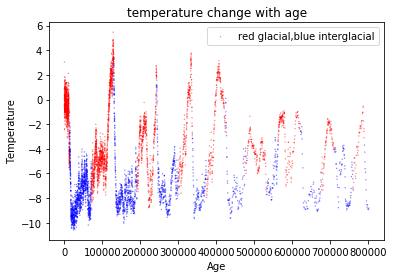

In [63]:
#colour = -np.arctan2(deu, temperature) # 生成每个点的颜色大小，每个数据点生成控制颜色的数组 colour
plt.scatter(age,temp,s=0.05,c=colour,label="red glacial,blue interglacial" )
#plt.colorbar() 
plt.xlabel('Age')
plt.ylabel('Temperature')
plt.title("temperature change with age")
plt.legend()

No handles with labels found to put in legend.


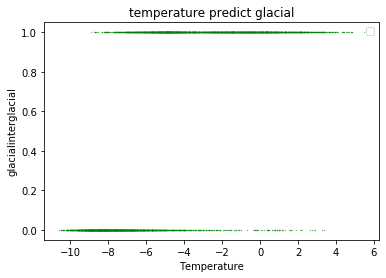

In [66]:
#colour = -np.arctan2(deu, temperature) # 生成每个点的颜色大小，每个数据点生成控制颜色的数组 colour
plt.scatter(temp,glacial,s=0.05,c='g' )
#plt.colorbar() 
plt.ylabel('glacialinterglacial')
plt.xlabel('Temperature')
plt.title("temperature predict glacial")
plt.legend()

In [68]:
log_model = linear_model.LogisticRegression()
log_model.fit(temp, glacial)
test = np.linspace(-10, 6).reshape(-1, 1)
gla_pred = log_model.predict(test)
gla_prob = log_model.predict_proba(test)

/Users/machang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


No handles with labels found to put in legend.


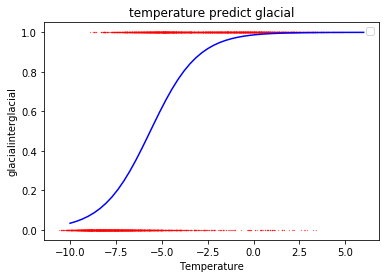

In [77]:
prob = gla_prob[:,1]
#colour = -np.arctan2(deu, temperature) # 生成每个点的颜色大小，每个数据点生成控制颜色的数组 colour
plt.plot(test,prob,'b-' )
plt.scatter(temp,glacial,s=0.05,c='r' )
plt.ylabel('glacialinterglacial')
plt.xlabel('Temperature')
plt.title("temperature predict glacial")
plt.legend()

In [86]:
pred_glacial_compare= log_model.predict(temp)

In [87]:
cm = confusion_matrix(glacial, pred_glacial_compare)

In [83]:
print(cm)

[[2147  392]
 [ 481 2765]]


In [103]:
pred_o18_temp = model.predict(new_o18.values.reshape(-1,1))

In [107]:
pred_glacial_53= log_model.predict(pred_o18_temp.flatten().reshape(-1,1))

No handles with labels found to put in legend.


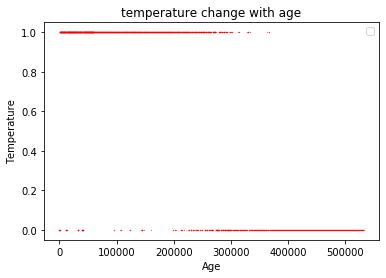

In [109]:
#colour = -np.arctan2(deu, temperature) # 生成每个点的颜色大小，每个数据点生成控制颜色的数组 colour
plt.scatter(time,pred_glacial_53,s=0.05,c='r' )
#plt.colorbar() 
plt.xlabel('Age')
plt.ylabel('glacialinterglacial')
plt.title("predicted glacialinterglacial for past 5.3 million years")
plt.legend()